# Installing DASK

**Using conda**
* Dask is installed in Anaconda by default. You can update it using the following command:

     `conda install dask`

**Using pip**

* To install Dask using pip, simply use the below code in your command prompt/terminal window:

     `pip install “dask[complete]”`



In [ ]:
#Installing of Dask
!pip install "dask[complete]"

In [2]:
#Module to ignore the warnings
import warnings
warnings.filterwarnings('ignore')

# **Simple Dask Example**

## **Importing the dask libraries**

In [3]:
import dask
from dask.delayed import delayed
import dask.dataframe as dd

In Simple Dask Example, We will be creating a two fucntions, apply_interest(),get_total_value() using both normal and Dask methods

Normal Method

In [4]:
from time import sleep
def apply_interest(amount,time_interest,roi):
  sleep(1)
  interest=(amount*time_interest*roi)/100
  return interest

def get_total(amount,a,b):
  sleep(1)
  return amount+a+b

def get_total_value(amount):
  sleep(1)
  #after 2 years
  a=apply_interest(amount,time_interest=2,roi=10)
  #after next 3 years
  b=apply_interest(amount,time_interest=3,roi=10)
  get_total(amount,a,b)

In [5]:
%%time
z = get_total_value(1000)

CPU times: user 469 µs, sys: 96 µs, total: 565 µs
Wall time: 4 s


Using Dask which uses dask.delayed() whose object keep track of all functions to call arguements to pass to it

In [6]:
%%time
z = delayed(get_total_value)(1000)

CPU times: user 91 µs, sys: 1.03 ms, total: 1.12 ms
Wall time: 1.21 ms


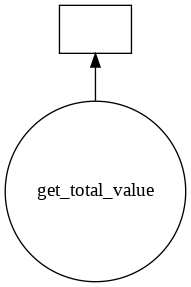

In [7]:
#Task Graph
z.visualize()

## Parallel Computing in for Loop

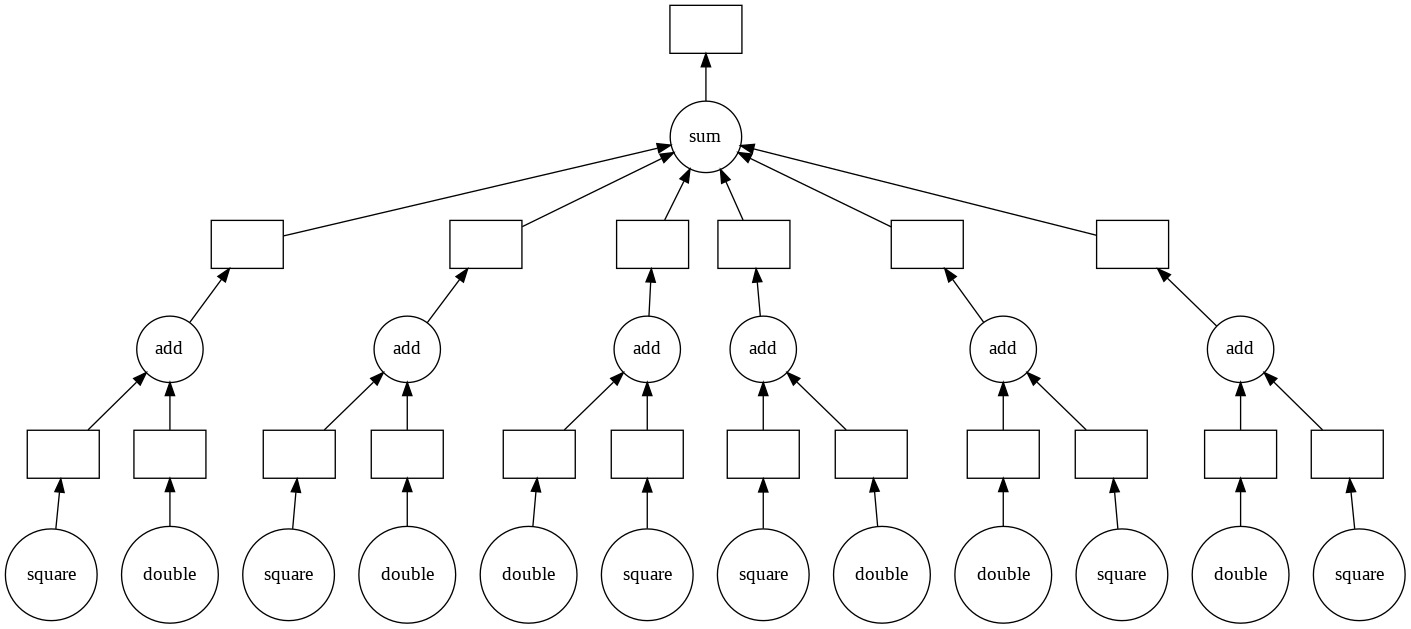

In [8]:
# Functions to perform mathematics operations
def square(x):
    return x*x

def double(x):
    return x*2

def add(x, y):
    return x + y

# For loop that calls the above functions for each data
output = []
for i in range(6):
    a = delayed(square)(i)
    b = delayed(double)(i)
    c = delayed(add)(a, b)
    output.append(c)

total = dask.delayed(sum)(output)

# Visualizing the task graph for the problem
total.visualize()

You can use delayed as decorator , We get the same output


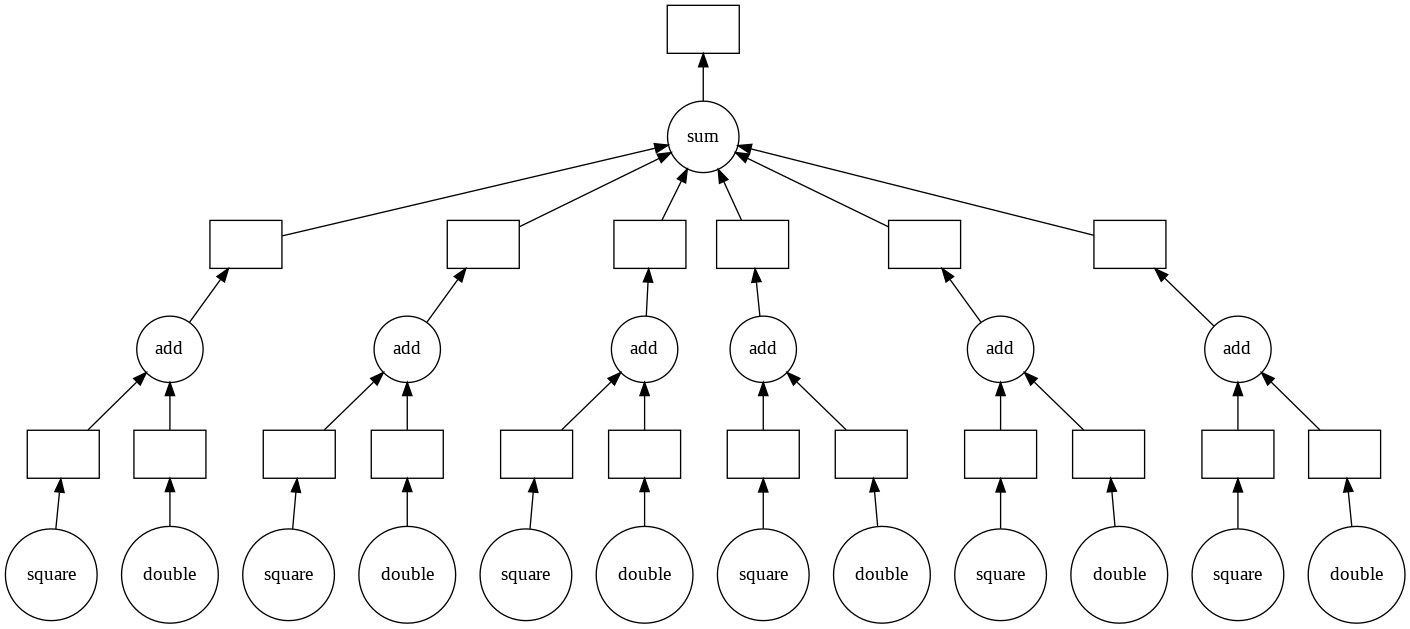

In [9]:
# Using delayed as a decorator to achieve parallel computing.

@delayed
def square(x):
    return x*x

@delayed
def double(x):
    return x*2

@delayed
def add(x, y):
    return x + y

# No change has to be done in function calls
output = []
for i in range(6):
    a = square(i)
    b = double(i)
    c = add(a, b)
    output.append(c)

total = dask.delayed(sum)(output)
total.visualize()

# **Implementations**

### Time Series dataset in dask

In [10]:
data_frame = dask.datasets.timeseries()

In [11]:
data_frame.head()

,id,name,x,y
timestamp,,,,
2000-01-01 00:00:00,982,Ursula,0.898416,-0.785572
2000-01-01 00:00:01,1000,Kevin,0.366522,-0.035444
2000-01-01 00:00:02,1024,Victor,-0.831571,-0.974327
2000-01-01 00:00:03,963,Ingrid,0.560496,-0.848002
2000-01-01 00:00:04,1006,Michael,-0.656446,-0.219274


In [12]:
# Converting dask dataframe into pandas dataframe
result_df=data_frame.compute()
type(result_df)

pandas.core.frame.DataFrame

In [13]:
data_frame.compute()

,id,name,x,y
timestamp,,,,
2000-01-01 00:00:00,982,Ursula,0.898416,-0.785572
2000-01-01 00:00:01,1000,Kevin,0.366522,-0.035444
2000-01-01 00:00:02,1024,Victor,-0.831571,-0.974327
2000-01-01 00:00:03,963,Ingrid,0.560496,-0.848002
2000-01-01 00:00:04,1006,Michael,-0.656446,-0.219274
...,...,...,...,...
2000-01-30 23:59:55,981,Tim,-0.278076,-0.598504
2000-01-30 23:59:56,1004,Yvonne,0.466411,-0.424894
2000-01-30 23:59:57,1032,Sarah,-0.076053,0.871270


In [14]:
data_frame.persist()

,id,name,x,y
npartitions=30,,,,
2000-01-01,int64,object,float64,float64
2000-01-02,...,...,...,...
...,...,...,...,...
2000-01-30,...,...,...,...
2000-01-31,...,...,...,...


In [131]:
%%time
data_frame.resample('3T')

CPU times: user 245 µs, sys: 27 µs, total: 272 µs
Wall time: 286 µs


**Using smaller Dataset for computations and comparing with Pandas**

## Meta data of Cerals.csv

Fields in the dataset:

* Name: Name of cereal
* mfr: Manufacturer of cereal
```
    A = American Home Food Products;
    G = General Mills
    K = Kelloggs
    N = Nabisco
    P = Post
    Q = Quaker Oats
    R = Ralston Purina
```



* type:
``` 
    cold
    hot 
    ```
* calories: calories per serving
* protein: grams of protein
*  fat: grams of fat
* sodium: milligrams of sodium
* fiber: grams of dietary fiber
* carbo: grams of complex carbohydrates
* sugars: grams of sugars
* potass: milligrams of potassium
* vitamins: vitamins and minerals - 0, 25, or 100, indicating the typical 
* percentage of FDA recommended
* shelf: display shelf (1, 2, or 3, counting from the floor)
* weight: weight in ounces of one serving
* cups: number of cups in one serving
* rating: a rating of the cereals (Possibly from Consumer Reports?)

Here rating is the target variable

## Importing libraries

In [16]:
import pandas as pd
import dask.dataframe as dd

Reading of cerals.csv in pandas and dask

In [17]:
%%time
cerals_pandas=pd.read_csv("/content/cereal.csv")


CPU times: user 5.7 ms, sys: 0 ns, total: 5.7 ms
Wall time: 6.46 ms


In [18]:
%%time
cerals_dask=dd.read_csv("/content/cereal.csv")

CPU times: user 6.65 ms, sys: 1.79 ms, total: 8.44 ms
Wall time: 9.74 ms


Parallelizable operations in both Pandas and Dask

In [19]:
cerals_pandas.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


Elementwise operations

In [20]:
%%time
diff_protein_fat_D=cerals_dask.protein-cerals_dask.fat

CPU times: user 932 µs, sys: 0 ns, total: 932 µs
Wall time: 942 µs


In [21]:
%%time
diff_protein_fat_P=cerals_pandas.protein-cerals_pandas.fat

CPU times: user 2.87 ms, sys: 0 ns, total: 2.87 ms
Wall time: 2.95 ms


In [22]:
diff_protein_fat_P

0     3
1    -2
2     3
3     4
4     0
     ..
72    1
73    0
74    2
75    2
76    1
Length: 77, dtype: int64

In [23]:
diff_protein_fat_D

Dask Series Structure:
npartitions=1
    int64
      ...
dtype: int64
Dask Name: sub, 4 tasks

In [24]:
diff_protein_fat_D.compute()

0     3
1    -2
2     3
3     4
4     0
     ..
72    1
73    0
74    2
75    2
76    1
Length: 77, dtype: int64

In [25]:
%%time
cerals_pandas[cerals_pandas.mfr.isin(['K'])]

CPU times: user 1.38 ms, sys: 0 ns, total: 1.38 ms
Wall time: 1.44 ms


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912
6,Apple Jacks,K,C,110,2,0,125,1.0,11.0,14,30,25,2,1.00,1.00,33.174094
16,Corn Flakes,K,C,100,2,0,290,1.0,21.0,2,35,25,1,1.00,1.00,45.863324
17,Corn Pops,K,C,110,1,0,90,1.0,13.0,12,20,25,2,1.00,1.00,35.782791
19,Cracklin' Oat Bran,K,C,110,3,3,140,4.0,10.0,7,160,25,3,1.00,0.50,40.448772
21,Crispix,K,C,110,2,0,220,1.0,21.0,3,30,25,3,1.00,1.00,46.895644
24,Froot Loops,K,C,110,2,1,125,1.0,11.0,13,30,25,2,1.00,1.00,32.207582
25,Frosted Flakes,K,C,110,1,0,200,1.0,14.0,11,25,25,1,1.00,0.75,31.435973
26,Frosted Mini-Wheats,K,C,100,3,0,0,3.0,14.0,7,100,25,2,1.00,0.80,58.345141


In [26]:
%%time
cerals_dask[cerals_dask.mfr.isin(['K'])]

CPU times: user 4.06 ms, sys: 13 µs, total: 4.08 ms
Wall time: 4.99 ms


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
npartitions=1,,,,,,,,,,,,,,,,
,object,object,object,int64,int64,int64,int64,float64,float64,int64,int64,int64,int64,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [27]:
#Groupby 

%%time
cerals_pandas.groupby(cerals_pandas.mfr).max()

CPU times: user 19.3 ms, sys: 0 ns, total: 19.3 ms
Wall time: 20 ms


,name,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
mfr,,,,,,,,,,,,,,,
A,Maypo,H,100,4,1,0,0.0,16.0,3,95,25,2,1.00,1.00,54.850917
G,Wheaties Honey Gold,C,140,6,3,290,4.0,21.0,14,230,100,3,1.50,1.50,51.592193
K,Special K,C,160,6,3,320,14.0,22.0,15,330,100,3,1.50,1.00,93.704912
N,Strawberry Fruit Wheats,H,100,4,1,130,10.0,21.0,6,280,25,3,1.00,1.00,74.472949
P,Post Nat. Raisin Bran,C,120,3,3,210,6.0,17.0,15,260,25,3,1.33,1.33,53.371007
Q,Quaker Oatmeal,H,120,5,5,220,2.7,14.0,12,135,25,3,1.00,1.00,63.005645
R,Wheat Chex,C,150,4,3,280,4.0,23.0,11,170,25,3,1.00,1.13,49.787445


In [28]:
%%time
cerals_dask.groupby(cerals_dask.mfr).max()

CPU times: user 22.5 ms, sys: 0 ns, total: 22.5 ms
Wall time: 23.3 ms


,name,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
npartitions=1,,,,,,,,,,,,,,,
,object,object,int64,int64,int64,int64,float64,float64,int64,int64,int64,int64,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [29]:
cerals_dask.groupby(cerals_dask.mfr).max().compute()

,name,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
mfr,,,,,,,,,,,,,,,
A,Maypo,H,100,4,1,0,0.0,16.0,3,95,25,2,1.00,1.00,54.850917
G,Wheaties Honey Gold,C,140,6,3,290,4.0,21.0,14,230,100,3,1.50,1.50,51.592193
K,Special K,C,160,6,3,320,14.0,22.0,15,330,100,3,1.50,1.00,93.704912
N,Strawberry Fruit Wheats,H,100,4,1,130,10.0,21.0,6,280,25,3,1.00,1.00,74.472949
P,Post Nat. Raisin Bran,C,120,3,3,210,6.0,17.0,15,260,25,3,1.33,1.33,53.371007
Q,Quaker Oatmeal,H,120,5,5,220,2.7,14.0,12,135,25,3,1.00,1.00,63.005645
R,Wheat Chex,C,150,4,3,280,4.0,23.0,11,170,25,3,1.00,1.13,49.787445


In [145]:
%%time
cerals_pandas.shelf.value_counts()

CPU times: user 1.88 ms, sys: 0 ns, total: 1.88 ms
Wall time: 6.23 ms


3    36
2    21
1    20
Name: shelf, dtype: int64

In [142]:
%%time
cerals_dask.shelf.value_counts()

CPU times: user 2.93 ms, sys: 0 ns, total: 2.93 ms
Wall time: 2.8 ms


Dask Series Structure:
npartitions=1
    int64
      ...
Name: shelf, dtype: int64
Dask Name: value-counts-agg, 4 tasks

## Works Slow

In [32]:
#setting index
%%time
cerals_pandas.set_index('name')

CPU times: user 1.62 ms, sys: 0 ns, total: 1.62 ms
Wall time: 2.52 ms


,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
name,,,,,,,,,,,,,,,
100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445


In [33]:
%%time
cerals_dask.set_index('name')

CPU times: user 22.1 ms, sys: 0 ns, total: 22.1 ms
Wall time: 22.2 ms


,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
npartitions=1,,,,,,,,,,,,,,,
100% Bran,object,object,int64,int64,int64,int64,float64,float64,int64,int64,int64,int64,float64,float64,float64
Wheaties Honey Gold,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [34]:
#group by
%%time
cerals_pandas.groupby(cerals_pandas.mfr)

CPU times: user 309 µs, sys: 0 ns, total: 309 µs
Wall time: 318 µs


In [35]:
%%time
cerals_dask.groupby(cerals_dask.mfr)

CPU times: user 1.21 ms, sys: 0 ns, total: 1.21 ms
Wall time: 1.55 ms


## MetaData of Face Exp 



Each line in the CSV files has the following entries:
* URL of image1 (string)
* Top-left column of the face bounding box in image1 normalized by width (float)
* Bottom-right column of the face bounding box in image1 normalized by width (float)
* Top-left row of the face bounding box in image1 normalized by height (float)
* Bottom-right row of the face bounding box in image1 normalized by height (float)
* URL of image2 (string)
* Top-left column of the face bounding box in image2 normalized by width (float)
* Bottom-right column of the face bounding box in image2 normalized by width (float)
* Top-left row of the face bounding box in image2 normalized by height (float)
* Bottom-right row of the face bounding box in image2 normalized by height (float)
* URL of image3 (string)
* Top-left column of the face bounding box in image3 normalized by width (float)
* Bottom-right column of the face bounding box in image3 normalized by width (float)
* Top-left row of the face bounding box in image3 normalized by height (float)
* Bottom-right row of the face bounding box in image3 normalized by height (float)
* Triplettype (string) - A string indicating the variation of expressions in the triplet. * Annotator1id (string) - This is just a string of random numbers that can be used to search for all the samples in the dataset annotated by a particular annotator.
* Annotation1 (integer)
* Annotator2_id (string)
* Annotation2 (integer)

## Reading Large  Datasets

In [36]:
%%time
DF_PANDAS=pd.read_csv("/content/faceexp-comparison-data-train-public.csv",error_bad_lines=False,header=None,engine='python',warn_bad_lines=False)

CPU times: user 443 ms, sys: 56.1 ms, total: 499 ms
Wall time: 502 ms


Here to include multiple files we must fetch the csv files into a pandas data frame and merge them to get the final colloborated data frame

In [37]:
DF_PANDAS.shape

(22063, 28)

In [38]:
dtypes=dtype={1:'string',
        16: 'float64',
       17: 'float64',
       18: 'float64',
       19: 'float64',
       20: 'float64',
       21: 'float64',
       22: 'float64',
       23: 'float64',
       24: 'float64',
       25: 'float64',
       26: 'float64',
       27: 'float64'}

In [39]:
%%time
DF_DASK=dd.read_csv("/content/faceexp-comparison-data*.csv",error_bad_lines=False,header=None,dtype=dtypes,warn_bad_lines=False,blocksize=None,engine='python')

CPU times: user 22.8 ms, sys: 1.67 ms, total: 24.5 ms
Wall time: 28.8 ms


In [40]:
DF_DASK.set_index(0)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
npartitions=2,,,,,,,,,,,,,,,,,,,,,,,,,,,
http://farm1.staticflickr.com/1/186137601_d1b8896958_b.jpg,string,float64,float64,float64,object,float64,float64,float64,float64,object,float64,float64,float64,float64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
http://farm4.staticflickr.com/3760/13641363095_c0294ab0b8_b.jpg,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
https://farm4.staticflickr.com/3812/9010637530_028f42854a_b.jpg,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [41]:
DF_DASK.shape

(Delayed('int-141401e7-20ab-4ff0-91bc-a458e96a9358'), 28)

In [42]:
DF_DASK.info()

<class 'dask.dataframe.core.DataFrame'>
Columns: 28 entries, 0 to 27
dtypes: string(1), object(4), float64(23)

In [43]:
DF_DASK.shape[0].compute() #It Reads all the files in the data frame and gives the rows count

44035

In [44]:
DF_DASK.npartitions #To know how many pandas data frames are present in dask

2

In [46]:
DF_DASK.divisions

('http://0.blog.xuite.net/0/2/1/b/13368594/blog_747921/txt/15838650/5.jpg', 'http://farm4.staticflickr.com/3745/10761852226_1f3b99cca3_b.jpg', 'https://zeeuwswielrennen.files.wordpress.com/2010/02/bauke-mollema1.jpg')


Accessing subsets of data frame using loc and iloc

In [47]:
DF_DASK.compute()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,http://farm4.staticflickr.com/3679/12137399835...,0.453125,0.655273,0.079019,0.407357,http://farm4.staticflickr.com/3372/5791826985_...,0.523734,0.675633,0.155660,0.419811,http://farm3.staticflickr.com/2712/4239337027_...,0.291992,0.391602,0.209635,0.364583,ONE_CLASS_TRIPLET,291301.0,3.0,300701.0,3.0,321902.0,3.0,322102.0,3.0,4.294979e+09,3.0,4.294990e+09,3.0
1,http://farm4.staticflickr.com/3679/12137399835...,0.453125,0.655273,0.079019,0.407357,http://farm6.staticflickr.com/5532/11255277973...,0.302734,0.568359,0.060150,0.535338,http://farm4.staticflickr.com/3850/14926048846...,0.576172,0.644531,0.102526,0.222883,ONE_CLASS_TRIPLET,291701.0,3.0,300701.0,1.0,300901.0,3.0,321501.0,3.0,3.219020e+05,2.0,3.221020e+05,3.0
2,http://farm4.staticflickr.com/3679/12137399835...,0.453125,0.655273,0.079019,0.407357,http://farm1.staticflickr.com/1/186137601_d1b8...,0.311558,0.444724,0.178711,0.298828,http://farm6.staticflickr.com/5519/12358234664...,0.036133,0.152344,0.298091,0.502203,TWO_CLASS_TRIPLET,291301.0,3.0,291701.0,3.0,300701.0,3.0,321501.0,3.0,3.216010e+05,3.0,3.219020e+05,3.0
3,http://farm4.staticflickr.com/3679/12137399835...,0.453125,0.655273,0.079019,0.407357,http://farm8.staticflickr.com/7345/11272369166...,0.185547,0.260742,0.146245,0.263505,http://farm8.staticflickr.com/7325/8724273816_...,0.337891,0.698242,0.000000,0.657986,TWO_CLASS_TRIPLET,291301.0,3.0,291701.0,2.0,321902.0,3.0,322102.0,2.0,4.294990e+09,2.0,4.831600e+04,3.0
4,http://farm4.staticflickr.com/3679/12137399835...,0.453125,0.655273,0.079019,0.407357,http://farm4.staticflickr.com/3760/13641363095...,0.408854,0.518229,0.277344,0.372070,http://farm4.staticflickr.com/3022/2819006049_...,0.140625,0.265625,0.196289,0.305664,THREE_CLASS_TRIPLET,291301.0,2.0,291701.0,2.0,321601.0,1.0,322102.0,2.0,4.294990e+09,2.0,4.831600e+04,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22058,http://farm4.staticflickr.com/3719/11739565564...,0.511719,0.807617,0.156174,0.582324,http://farm2.staticflickr.com/1198/717226902_a...,0.536685,0.703804,0.519531,0.659180,http://farm6.staticflickr.com/5534/12245661505...,0.224012,0.320644,0.166016,0.240234,THREE_CLASS_TRIPLET,221901.0,3.0,269701.0,1.0,291301.0,3.0,291701.0,1.0,3.007010e+05,1.0,4.120700e+04,1.0
22059,http://farm4.staticflickr.com/3719/11739565564...,0.511719,0.807617,0.156174,0.582324,http://farm4.staticflickr.com/3467/3880591913_...,0.000000,0.998536,0.000000,0.999023,http://farm5.staticflickr.com/4154/5051256436_...,0.255014,0.740688,0.081055,0.466797,TWO_CLASS_TRIPLET,300901.0,3.0,321402.0,3.0,321501.0,3.0,322102.0,3.0,4.120700e+04,3.0,4.294990e+09,3.0
22060,http://farm4.staticflickr.com/3719/11739565564...,0.511719,0.807617,0.156174,0.582324,http://farm3.staticflickr.com/2792/4438917476_...,0.417277,0.623719,0.175781,0.335938,http://farm3.staticflickr.com/2345/12972604593...,0.362500,0.445833,0.240625,0.387500,THREE_CLASS_TRIPLET,189501.0,2.0,249701.0,1.0,300901.0,2.0,321601.0,2.0,4.294979e+09,3.0,4.831600e+04,2.0
22061,http://farm4.staticflickr.com/3719/11739565564...,0.511719,0.807617,0.156174,0.582324,http://farm4.staticflickr.com/3761/9963243285_...,0.576696,0.787611,0.041992,0.205078,http://farm5.staticflickr.com/4084/5090708070_...,0.091667,0.323611,0.000000,0.289225,TWO_CLASS_TRIPLET,221901.0,3.0,269701.0,3.0,291301.0,3.0,291701.0,3.0,3.007010e+05,3.0,3.216010e+05,3.0


In [60]:
DF_DASK.loc['http://0.blog.xuite.net/0/2/1/b/13368594/blog_747921/txt/15838650/5.jpg']
#It provides the rows which has same index..which has been divided.

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
npartitions=2,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,object,string,float64,float64,float64,object,float64,float64,float64,float64,object,float64,float64,float64,float64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [53]:
DF_DASK.compute()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,http://farm4.staticflickr.com/3679/12137399835...,0.453125,0.655273,0.079019,0.407357,http://farm4.staticflickr.com/3372/5791826985_...,0.523734,0.675633,0.155660,0.419811,http://farm3.staticflickr.com/2712/4239337027_...,0.291992,0.391602,0.209635,0.364583,ONE_CLASS_TRIPLET,291301.0,3.0,300701.0,3.0,321902.0,3.0,322102.0,3.0,4.294979e+09,3.0,4.294990e+09,3.0
1,http://farm4.staticflickr.com/3679/12137399835...,0.453125,0.655273,0.079019,0.407357,http://farm6.staticflickr.com/5532/11255277973...,0.302734,0.568359,0.060150,0.535338,http://farm4.staticflickr.com/3850/14926048846...,0.576172,0.644531,0.102526,0.222883,ONE_CLASS_TRIPLET,291701.0,3.0,300701.0,1.0,300901.0,3.0,321501.0,3.0,3.219020e+05,2.0,3.221020e+05,3.0
2,http://farm4.staticflickr.com/3679/12137399835...,0.453125,0.655273,0.079019,0.407357,http://farm1.staticflickr.com/1/186137601_d1b8...,0.311558,0.444724,0.178711,0.298828,http://farm6.staticflickr.com/5519/12358234664...,0.036133,0.152344,0.298091,0.502203,TWO_CLASS_TRIPLET,291301.0,3.0,291701.0,3.0,300701.0,3.0,321501.0,3.0,3.216010e+05,3.0,3.219020e+05,3.0
3,http://farm4.staticflickr.com/3679/12137399835...,0.453125,0.655273,0.079019,0.407357,http://farm8.staticflickr.com/7345/11272369166...,0.185547,0.260742,0.146245,0.263505,http://farm8.staticflickr.com/7325/8724273816_...,0.337891,0.698242,0.000000,0.657986,TWO_CLASS_TRIPLET,291301.0,3.0,291701.0,2.0,321902.0,3.0,322102.0,2.0,4.294990e+09,2.0,4.831600e+04,3.0
4,http://farm4.staticflickr.com/3679/12137399835...,0.453125,0.655273,0.079019,0.407357,http://farm4.staticflickr.com/3760/13641363095...,0.408854,0.518229,0.277344,0.372070,http://farm4.staticflickr.com/3022/2819006049_...,0.140625,0.265625,0.196289,0.305664,THREE_CLASS_TRIPLET,291301.0,2.0,291701.0,2.0,321601.0,1.0,322102.0,2.0,4.294990e+09,2.0,4.831600e+04,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22058,http://farm4.staticflickr.com/3719/11739565564...,0.511719,0.807617,0.156174,0.582324,http://farm2.staticflickr.com/1198/717226902_a...,0.536685,0.703804,0.519531,0.659180,http://farm6.staticflickr.com/5534/12245661505...,0.224012,0.320644,0.166016,0.240234,THREE_CLASS_TRIPLET,221901.0,3.0,269701.0,1.0,291301.0,3.0,291701.0,1.0,3.007010e+05,1.0,4.120700e+04,1.0
22059,http://farm4.staticflickr.com/3719/11739565564...,0.511719,0.807617,0.156174,0.582324,http://farm4.staticflickr.com/3467/3880591913_...,0.000000,0.998536,0.000000,0.999023,http://farm5.staticflickr.com/4154/5051256436_...,0.255014,0.740688,0.081055,0.466797,TWO_CLASS_TRIPLET,300901.0,3.0,321402.0,3.0,321501.0,3.0,322102.0,3.0,4.120700e+04,3.0,4.294990e+09,3.0
22060,http://farm4.staticflickr.com/3719/11739565564...,0.511719,0.807617,0.156174,0.582324,http://farm3.staticflickr.com/2792/4438917476_...,0.417277,0.623719,0.175781,0.335938,http://farm3.staticflickr.com/2345/12972604593...,0.362500,0.445833,0.240625,0.387500,THREE_CLASS_TRIPLET,189501.0,2.0,249701.0,1.0,300901.0,2.0,321601.0,2.0,4.294979e+09,3.0,4.831600e+04,2.0
22061,http://farm4.staticflickr.com/3719/11739565564...,0.511719,0.807617,0.156174,0.582324,http://farm4.staticflickr.com/3761/9963243285_...,0.576696,0.787611,0.041992,0.205078,http://farm5.staticflickr.com/4084/5090708070_...,0.091667,0.323611,0.000000,0.289225,TWO_CLASS_TRIPLET,221901.0,3.0,269701.0,3.0,291301.0,3.0,291701.0,3.0,3.007010e+05,3.0,3.216010e+05,3.0


# Model Building

In [ ]:
!pip install dask distributed

## Using Scikit-learn and joblib

In [61]:
# Import dask.distributed.Client and pandas
from dask.distributed import Client
import pandas as pd
import time

# Initializing a client
client = Client(processes=False)
client

Client Scheduler: inproc://172.28.0.2/1592/1 Dashboard: http://172.28.0.2:8787/status,Cluster Workers: 1 Cores: 2 Memory: 13.65 GB


**Create Scikit-Learn Estimator**

In [62]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import pandas as pd

In [63]:
X, Y = make_classification(n_samples=1000, random_state=0)

In [64]:
param_grid = {"C": [0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0],
              "kernel": ['rbf', 'poly', 'sigmoid'],
              "shrinking": [True, False]}

grid_search = GridSearchCV(SVC(gamma='auto', random_state=0, probability=True),
                           param_grid=param_grid,
                           return_train_score=False,
                           cv=3,
                           n_jobs=-1)

In [65]:
grid_search.fit(X, Y)

GridSearchCV(cv=3,
             estimator=SVC(gamma='auto', probability=True, random_state=0),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0],
                         'kernel': ['rbf', 'poly', 'sigmoid'],
                         'shrinking': [True, False]})

To fit it using the cluster, we just need to use a context manager provided by joblib.

In [66]:
import joblib

with joblib.parallel_backend('dask'):
    grid_search.fit(X, Y)

In [ ]:
pd.DataFrame(grid_search.cv_results_)

In [68]:
pd.DataFrame(grid_search.cv_results_).sort_values(by='mean_test_score', ascending=False, inplace=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,param_shrinking,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
24,0.136645,0.004563,0.011760,0.000268,1,rbf,True,"{'C': 1.0, 'kernel': 'rbf', 'shrinking': True}",0.952096,0.939940,0.954955,0.948997,0.006510,1
31,0.119771,0.004300,0.011064,0.000690,2,rbf,False,"{'C': 2.0, 'kernel': 'rbf', 'shrinking': False}",0.952096,0.939940,0.954955,0.948997,0.006510,1
25,0.130595,0.004248,0.012946,0.001569,1,rbf,False,"{'C': 1.0, 'kernel': 'rbf', 'shrinking': False}",0.952096,0.939940,0.954955,0.948997,0.006510,1
30,0.131624,0.009991,0.011241,0.000354,2,rbf,True,"{'C': 2.0, 'kernel': 'rbf', 'shrinking': True}",0.952096,0.939940,0.954955,0.948997,0.006510,1
37,0.127282,0.000126,0.012056,0.000611,5,rbf,False,"{'C': 5.0, 'kernel': 'rbf', 'shrinking': False}",0.955090,0.936937,0.954955,0.948994,0.008526,5


In [69]:
grid_search.predict(X)[:10]

array([0, 1, 1, 1, 0, 1, 0, 0, 1, 0])

In [70]:
grid_search.score(X, Y)

0.983

In [79]:
grid_search.best_estimator_

SVC(gamma='auto', probability=True, random_state=0)

## Using Data Frame

In [ ]:
!pip install dask-ml

Preprocessing steps:

In [82]:
cerals_dask.dtypes

name         object
mfr          object
type         object
calories      int64
protein       int64
fat           int64
sodium        int64
fiber       float64
carbo       float64
sugars        int64
potass        int64
vitamins      int64
shelf         int64
weight      float64
cups        float64
rating      float64
dtype: object

In [81]:
cerals_dask.isnull().sum().compute()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [86]:
#defining the data and target
categorical_variables = cerals_dask.select_dtypes(include=['object']).columns
target = cerals_dask['rating']

In [100]:
train,test=cerals_dask.random_split([0.7,0.3])

In [104]:
# dask operation
raw_data_train = train.drop('rating', axis=1)
raw_data_test = test.drop('rating', axis=1)

# conversion to pandas
cerals_dask_X_train = raw_data_train.compute()
cerals_dask_X_test = raw_data_test.compute()

In [109]:
target_train=train['rating']
target_test=train['rating']

In [113]:
cerals_dask_dummies_train=dd.get_dummies(cerals_dask_X_train)
cerals_dask_dummies_test=dd.get_dummies(cerals_dask_X_test)

In [106]:
#converting dataframe to array

data_train=cerals_dask_dummies_train.values
data_test=cerals_dask_dummies_test.values

In [107]:
#fit the model
from dask_ml.linear_model import LinearRegression

In [110]:
lr = LinearRegression()
lr.fit(data_train, target_train)

LinearRegression()

In [121]:
data_test.shape

(20, 39)

In [127]:
#predict on test and upload
pred=lr.predict(data_test)

In [128]:
pred

array([67.4804925 , 58.5922286 , 92.43686544, 28.9280942 , 32.56657878,
       36.34745978, 48.33513758, 52.51051114, 19.35065671, 39.70606674,
       22.23494652, 40.74372814, 45.11902365, 21.90205072, 63.61018675,
       46.13412281, 35.53770891, 43.61679972, 31.60510324, 30.85526548,
       57.45158367, 40.21790401, 40.33256213, 27.47143095, 34.61312763,
       52.55206313, 45.05750802, 21.37982439, 30.49000755, 35.88572451,
       35.81097078, 26.18879885, 54.03285013, 33.50773262, 29.37064051,
       39.98176166, 58.74291731, 29.86295041, 37.18904551, 40.82253016,
       59.8619188 , 48.73372049, 50.08002425, 38.59622821, 39.0298946 ,
       54.49666842, 39.88003486, 67.28022739, 73.44080295, 71.78836586,
       52.31594414, 38.14571592, 28.01121569, 45.88738367, 38.42637386,
       50.7538136 , 35.52734611])